<a href="https://colab.research.google.com/github/PullenN9163/senior_design/blob/main/nas_p_youtube_viral_video_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youtube Trending Data Analysis
## Nas Pullen
---

# 1. Introduction
---

The goal of this project is to analyze and predict the factors that contribute to YouTube videos going viral. By leveraging YouTube trending data, I aim to identify key metrics and patterns that differentiate viral videos from non-viral ones. Specifically, I will focus on the US region dataset from the YouTube Trending Video Dataset available on Kaggle, which includes metrics such as video title, channel title, publish time, tags, views, likes, dislikes, description, and comment count. Using this data, we will develop machine learning models to classify videos based on their likelihood of trending for more than one day.

The main questions we aim to address are:

* What features (e.g., views, likes, dislikes, comment count, etc.) are most influential in determining whether a video will trend for more than one day?

* Can I build a predictive model that accurately classifies videos as viral or non-viral based on these features?

* How do different machine learning models perform in predicting virality, and which model yields the highest accuracy?

To achieve these objectives, the project will be structured into three main phases:

* Data Preprocessing & Feature Engineering: I will clean the dataset, handle missing values, encode categorical variables, and select or engineer relevant features that contribute to the prediction task.

* Model Development & Training: I will implement and train classification models, including Decision Trees, Random Forests, and K-Nearest Neighbors (KNN), to predict whether a video will trend for more than one day.

* Performance Evaluation: I will evaluate and compare the performance of the models using metrics such as accuracy, precision, recall, and F1-score to determine the most effective approach for predicting virality.

By the end of this project, I aim to provide actionable insights into the factors that drive YouTube video virality and deliver a robust predictive model that can be used to identify potential viral content. This analysis will not only contribute to understanding the dynamics of trending videos but also offer practical value for content creators and marketers aiming to optimize their YouTube strategies.



# 2. Data Description
---
- Data Source: Describe the origin of your dataset. Provide a link if applicable.
- Data Loading: Present the code and methods for acquiring the data. Load the data into appropriate format for analysis.
- Dataset Analysis: Analyze the key attributes and features of your dataset (e.g., number of rows, columns, types of data).
- Data Cleaning: Clean and preprocess the data, including handling missing values or duplicates.

# Data Source:
The dataset I chose to use for this project is the YouTube Trending Video Dataset from Kaggle (https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset/data?select=US_youtube_trending_data.csv). The Kaggle dataset includes top trending videos from YouTube and was created by leveraging the YouTube API to scrape trending video data from the platform. For the sake of our project I will only be focusing on US YouTube Trending Data.

The dataset is in CSV format and includes information such as:
*   video title
* channel title
* publish time
* tags
* views
* likes
* dislikes
* description
* comment count





# Data Loading:

In [ ]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import json
import datetime
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/US_youtube_trending_data.csv'

In [ ]:
df = pd.read_csv(file_path)

# Data Analysis:

In [ ]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_to_trending,log_views,log_likes,log_comments,viral
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,...,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,4.662778,14.230672,11.963421,10.472035,1
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,...,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",6.997222,14.683320,11.896418,9.714141,1
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,...,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,7.431667,14.527898,12.776453,10.602169,1
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,...,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,7.351389,13.115886,10.054146,8.942199,1
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,...,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,8.831944,13.932306,10.732105,7.694848,1


In [ ]:
df.shape

(268787, 21)

In [ ]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'time_to_trending', 'log_views',
       'log_likes', 'log_comments', 'viral'],
      dtype='object')

In [ ]:
print(df.describe())

          categoryId    view_count         likes       dislikes  \
count  268787.000000  2.687870e+05  2.687870e+05  268787.000000   
mean       18.743511  2.734467e+06  1.314697e+05    1134.277495   
std         6.786562  9.794087e+06  4.539469e+05    8047.291315   
min         1.000000  0.000000e+00  0.000000e+00       0.000000   
25%        17.000000  4.725410e+05  1.796300e+04       0.000000   
50%        20.000000  9.368710e+05  4.020500e+04       0.000000   
75%        24.000000  2.106178e+06  9.877300e+04     467.000000   
max        29.000000  1.407644e+09  1.602153e+07  879354.000000   

       comment_count  time_to_trending      log_views      log_likes  \
count   2.687870e+05     268787.000000  268787.000000  268787.000000   
mean    1.014303e+04         85.671017      13.887403      10.607393   
std     7.260853e+04         61.122608       1.172417       1.593579   
min     0.000000e+00        -14.002778       0.000000       0.000000   
25%     1.280000e+03         45.7355

# Data Cleaning:

In [ ]:
# Convert trending_date and publishedAt to datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [ ]:
# Compute time difference between publish and trending
df['time_to_trending'] = (df['trending_date'] - df['publishedAt']).dt.total_seconds() / 3600

In [ ]:
#remove missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# 3. Exploratory Data Analysis
---
- Exploratory Analysis:
 * Use visualizations and summary statistics to understand the data.
 * Include plots such as histograms, scatter plots, box plots, correlation matrices, etc.
 * Explain key trends and relationships observed in the data.
- Insights: Provide interpretations of patterns, distributions, and anomalies in the data.
- Feature Engineering and Selection:
 * Extract or construct new features relevant to the problem.
 * Highlight the features that will be used in your model and justify their selection (e.g., based on correlation or domain knowledge).


In [ ]:
# Log-transform distributions for better visualization
df['log_views'] = np.log1p(df['view_count'])
df['log_likes'] = np.log1p(df['likes'])
df['log_comments'] = np.log1p(df['comment_count'])

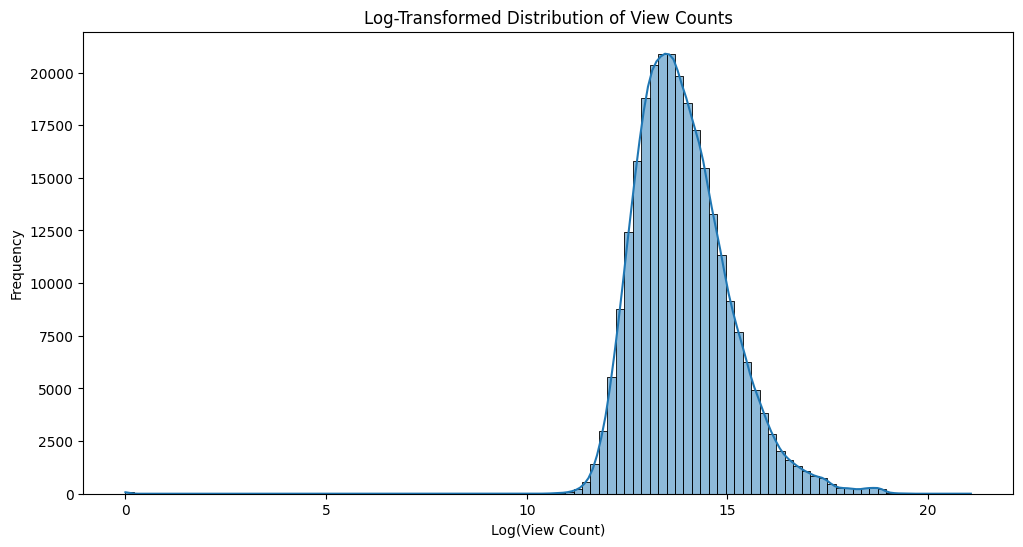

In [ ]:
#Visualize view count distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['log_views'], bins=100, kde=True)
plt.title('Log-Transformed Distribution of View Counts')
plt.xlabel('Log(View Count)')
plt.ylabel('Frequency')
plt.show()

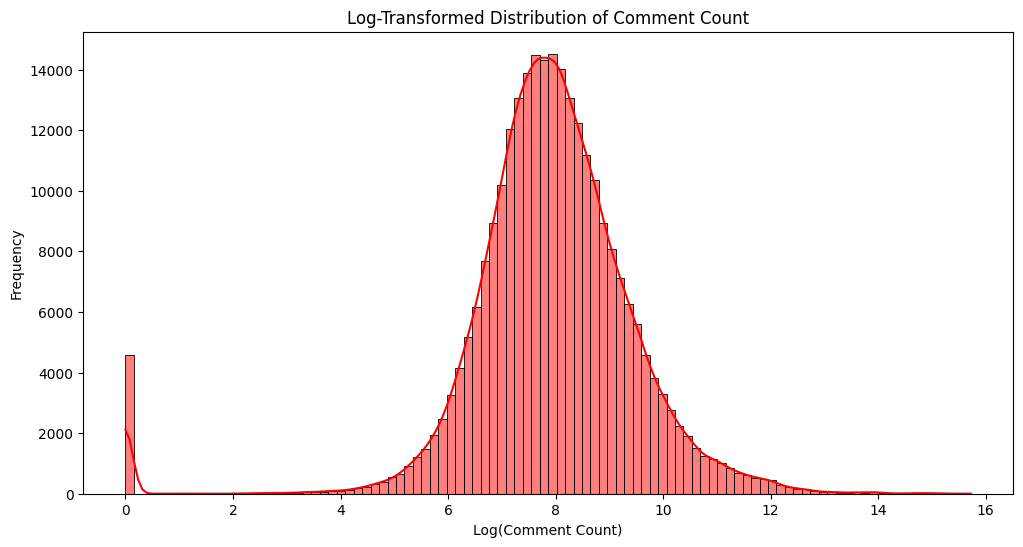

In [ ]:
#Visualize comment distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['log_comments'], bins=100, kde=True, color='red')
plt.title('Log-Transformed Distribution of Comment Count')
plt.xlabel('Log(Comment Count)')
plt.ylabel('Frequency')
plt.show()


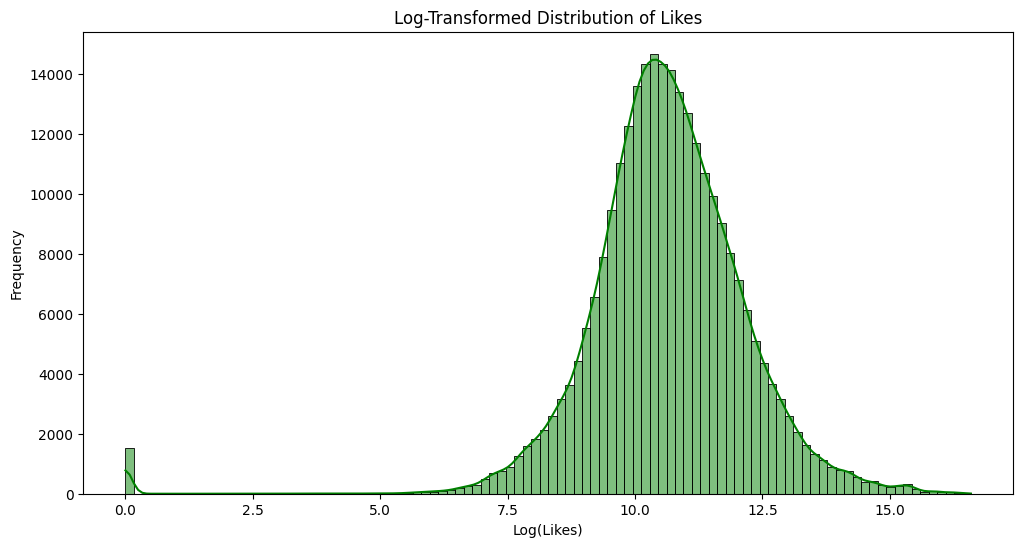

In [ ]:
#Visualize like distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['log_likes'], bins=100, kde=True, color='green')
plt.title('Log-Transformed Distribution of Likes')
plt.xlabel('Log(Likes)')
plt.ylabel('Frequency')
plt.show()

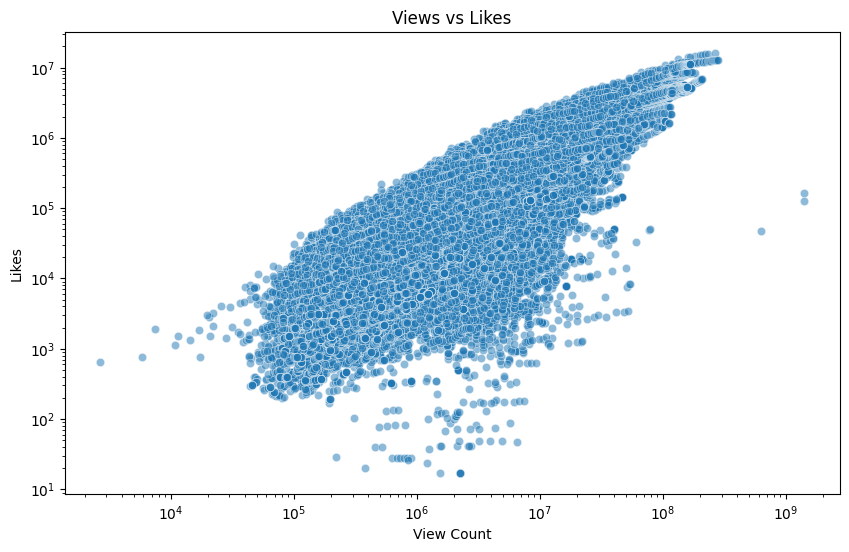

In [ ]:
# Scatter plot to explore relationship between views and likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['view_count'], y=df['likes'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Views vs Likes')
plt.xlabel('View Count')
plt.ylabel('Likes')
plt.show()

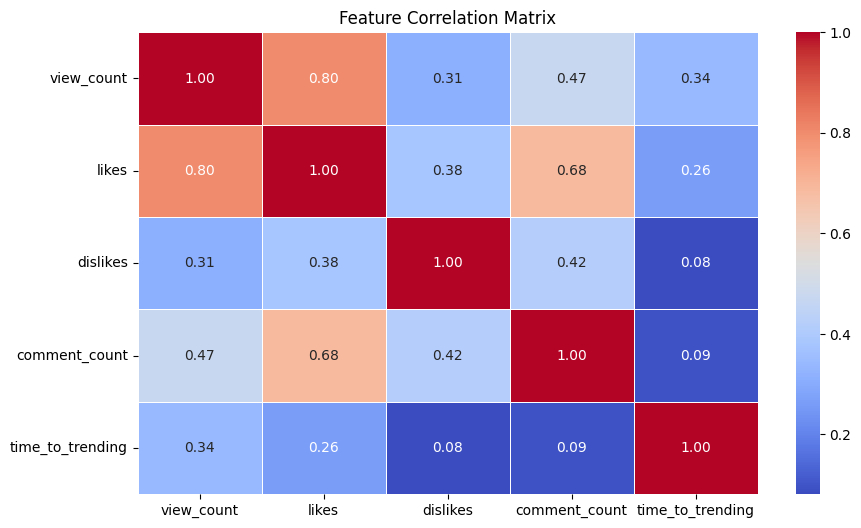

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
corr = df[['view_count', 'likes', 'dislikes', 'comment_count', 'time_to_trending']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
# Feature Engineering: Selecting key features for the model
features = ['view_count', 'likes', 'dislikes', 'comment_count', 'time_to_trending']
# Define viral as videos trending for more than one day
target = 'viral'
df['viral'] = df.groupby('video_id')['trending_date'].transform('count') > 1


In [ ]:
# Filter dataset for relevant features
df_model = df[features + [target]]

# Display feature set summary
print(df_model.head())

   view_count   likes  dislikes  comment_count  time_to_trending  viral
0     1514614  156908      5855          35313          4.662778  False
1     2381688  146739      2794          16549          6.997222  False
2     2038853  353787      2628          40221          7.431667  False
3      496771   23251      1856           7647          7.351389  False
4     1123889   45802       964           2196          8.831944  False


# **Summary of Exploratory Data Analysis (EDA) and Key Insights**

# Data Overview

The dataset consists of trending YouTube videos with metrics such as views, likes, dislikes, comments, and publish time. The data was cleaned and preprocessed, including:

* Converting trending_date and publishedAt to datetime format.
* Creating time_to_trending, a new feature representing the time difference  between when a video was published and when it started trending.

# Key Visualizations and Findings

1.   Distribution of Views, Likes, and Comments
*   The original histograms showed an extreme right-skewed distribution, where most videos had relatively low engagement while a few had exceptionally high values.
* Applying a log transformation (log1p) allowed for a clearer visualization, revealing a more balanced distribution.
* Most videos accumulate moderate views, likes, and comments, but a small percentage of videos (viral content) dominate in engagement.


2.  Relationship Between Engagement Metrics
* Strong correlation between views and likes: Videos with more views tend to receive more likes, suggesting user engagement scales with exposure.
* Weaker correlation between dislikes and other metrics: Dislikes do not significantly impact virality, indicating that even controversial videos can trend.
* The time-to-trending metric varies across videos, showing that some videos gain popularity immediately while others take longer to trend.

3. Correlation Analysis
* A heatmap of key numerical variables highlighted that views, likes, and comment count are the strongest indicators of virality.
* Dislikes have a much weaker correlation with trending, suggesting that they do not play a major role in a video’s overall performance.

# Feature Engineering for Predictive Modeling
Based on these insights, the following features were selected for training machine learning models:

* view_count – The number of times a video was watched.
* likes – A key engagement metric that strongly correlates with views.
* dislikes – Less influential but still considered for completeness.
* comment_count – Another strong engagement metric.
* time_to_trending – The speed at which a video trends, indicating virality potential.

A new target variable (viral) was defined:

A video is classified as viral if it trends for more than one day.

# Conclusion
This EDA phase reveals that engagement metrics such as views, likes, and comments are the primary indicators of virality. The log transformation significantly improves the visualization of skewed data. The next step is to use these features to build machine learning models to predict whether a video will go viral.

# 4. Model Building and Evaluation



### Model Selection:
I chose to use a classification machine learning technique primarily using a Random Forest Classifier. Since the 'viral' variable we created is binary, classification seemed most fitting with Random Forest for it's robustness against overfitting, ability to handle non-linearity, and strong generalization
### Model Implementation:


*   Data Loading & Cleaning
  * Load csv as pandas datafrane
  * Convert trending_date and publishedAt to datetime format
  * Compute time difference between publish and trending
*   Feature Selection
  * view_count
  * likes
  * dislikes
  * comment_count
  * time_to_trending
* Train-Test Split
  * 80/20 split for training and testing
* Model Training:
  * RandomForestClassifier (n_estimators=100, random_state=42)

### Model Evaluation:
I evaluated our model using the following metrics:
* Accuracy Score: Measures overall correctness of predictions.
* Confusion Matrix: Shows true positives, true negatives, false positives, and false negatives.
* Classification Report: Includes precision, recall, and F1-score.

###Model Interpretation:
Within the context of our problem I was able to learn that Based on our model I determined that likes, view_count, and comment_count have the highest impact on wether a video is viral or not.

# Random Forest Classifier:

In [ ]:
# Ensure 'viral' column exists and is boolean (convert True/False to 1/0)
df['viral'] = df['viral'].astype(int)

# Selecting relevant features
features = ['view_count', 'likes', 'dislikes', 'comment_count', 'time_to_trending']
target = 'viral'

# Drop rows with missing values in selected columns
df = df.dropna(subset=features + [target])

# Define X (features) and y (target)
X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8700573526906551

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     43511
           1       0.81      0.34      0.48      9320

    accuracy                           0.87     52831
   macro avg       0.84      0.66      0.70     52831
weighted avg       0.86      0.87      0.85     52831


Confusion Matrix:
 [[42752   759]
 [ 6106  3214]]


# 5. Challenges and Limitations


After processing the data and developing models aimed at predicting the factors that contribute to YouTube videos going viral, I encountered several challenges related to this project. The challenges and limitations included:


*   Potentially inflated data: Views and likes on YouTube can be artificially inflated, which means my CSV dataset may not accurately account for user engagement, potentially affecting my models.

*   External factors: The main goal for this project was to identify the factors that make YouTube videos trend. Upon reflecting on the data I used , I realized that there is information I was not accounting for that may play an important role. Information such as channel follower count, video shares (how many times the video was shared with someone), and the type of video (gaming, vlog, music, etc.) can all influence how popular a video becomes and might correlate to our exisitng data.

Regarding computational or model-related constraints a challenge that I encountered in regards to this incldues:


*   Processing Large Datasets (computational challenge): The dataset I used contained hundreds of thousands of lines I needed to process. Without manipulating the data, this could make it computationally expensive to train complex models

*   Overfitting models (models challenge): Decision Trees and Random Forests performed well on training data but risked overfitting, meaning they might not generalize well with an extensive tree depth



# Conclusion

Summary:
Our goal was to identify the factors that influence a video's popularity. Our dataset included metrics such as views, likes, dislikes, comments, and publish time. After preprocessing the data and analyzing it using various models, we identified the following key insights:

***Key Finding***
*  In our dataset, ***views and likes*** are strongly correlated, showing that user engagement scales with exposure.
*  The ***Dislikes***metric has minimal impact on virality/popularity, meaning even controversial videos can trend.
*  Some videos trend immediately, while others take time to gain traction
*  Overall, the metrics that are the strongest indicator factor are ***Views, Likes, and comment count***. According to our correlation analysis, these metrics matter the most when it comes to a video becoming viral.

***Next Steps***


*   Now that we've identified the main factors responsible for a trending video within our dataset, we need to incorporate external metrics not included in our dataset to determine their influence on a video's popularity. These external factors could include channel subscriber count, video shares, and other engagement metrics.



#References


*   Kaggle DataSet:  https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset/data?select=US_youtube_trending_data.csv
*   Models used: ***Decision Trees, Random Forests, and K-Nearest Neighbors (KNN)***

